# Setup & Imports

In [55]:
# ------------------ Data Manipulation ------------------
import pandas as pd          # DataFrame operations
import numpy as np           # Numerical computations

# ------------------ Visualization ------------------
import matplotlib.pyplot as plt  # Basic plotting
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting support
# import seaborn as sns             # Statistical visualization

# ------------------ Statistics & Analysis ------------------
from scipy.stats import pearsonr    # Pearson correlation
import scipy.stats as stats         # General statistical tools
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF

# ------------------ Machine Learning & Scaling ------------------
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Normalization and standardization
from sklearn.cluster import KMeans                              # KMeans clustering
from sklearn.preprocessing import PolynomialFeatures            # Polynomial basis for regression
from sklearn.linear_model import LinearRegression               # Linear regression model
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score
import joblib
import warnings
import json
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.inspection import PartialDependenceDisplay
import shap
from pdpbox import pdp

# ------------------ Optimization & Pareto Analysis ------------------
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting  # Pareto front identification
from scipy.interpolate import RBFInterpolator
from scipy.spatial import KDTree
from mpl_toolkits.mplot3d import Axes3D 

# ------------------ Geospatial Analysis ------------------
import geopandas as gpd         # Handling shapefiles and spatial data
import fiona                    # I/O support for geospatial formats
import pyogrio                  # Fast I/O for vector geodata
import rasterio                 # Raster data reading/writing
from rasterstats import zonal_stats  # Zonal statistics from rasters

# ------------------ Utility & System ------------------
import os                # File system interaction
import warnings          # Suppress warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

# ------------------ Pandas Display Settings ------------------
pd.options.display.float_format = '{:.2f}'.format         # Format float output
pd.set_option('display.max_columns', None)                # Show all columns

# ------------------ Matplotlib Settings ------------------
plt.rcParams['font.sans-serif'] = ['Arial']              # Support Chinese characters
plt.rcParams['axes.unicode_minus'] = False                # Display minus signs correctly

# Inline plot display (only needed in notebooks)
%matplotlib inline
from scipy.interpolate import RBFInterpolator

# Data preprocess

In [10]:
df = pd.read_csv('../data/grid500_36cities.csv')
grid500 = df.copy()
print(grid500.shape)
grid500.head()

(196770, 47)


,Global_ID,City,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightOtherness,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,footprintAreaTotal,totalArea,areaVariance,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,evennessIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label
0,0,Beijing,6.18,7.03,1649.86,0.00,31,93.00,3.00,3.00,3.00,0.00,0.03,0.00,0.00,180,6500.98,209.71,831.63,32.55,5.07,0.56,88704.58,88704.58,50961857.70,2861.44,132998.25,0.47,0.01,0.80,234.60,0.35,0.35,0.84,0.89,4.00,0.00,0.20,5,1,5.81,52.56,14.99,620.94,268.09,2565.57,5.00
1,1,Beijing,5.74,7.23,155.86,0.00,29,87.00,3.00,3.00,3.00,0.00,0.03,0.00,0.00,149,3810.39,131.39,272.14,15.33,5.17,0.62,33119.49,33119.49,1261729.88,1142.05,196625.22,0.67,0.26,0.89,35.66,0.13,0.13,0.86,0.94,12.00,0.64,0.20,7,1,5.14,34.22,6.82,594.16,300.09,2010.84,5.00
2,2,Beijing,11.32,13.62,57.14,0.00,22,66.00,3.00,3.00,3.00,0.00,0.05,0.00,0.00,117,3645.40,165.70,668.26,28.73,4.92,0.56,51092.86,51092.86,30358745.83,2322.40,132197.31,0.53,0.01,0.90,151.50,0.20,0.20,0.88,0.93,0.00,0.00,0.20,1,0,5.32,47.90,17.34,610.84,283.84,2044.73,5.00
3,3,Beijing,11.73,14.36,243.57,0.00,8,24.00,3.00,3.00,3.00,0.00,0.12,0.00,0.00,42,1147.60,143.45,283.01,75.66,5.70,0.60,8534.61,8534.61,958399.89,1066.83,205685.37,0.82,0.02,0.95,15.54,0.03,0.03,0.93,0.98,0.00,0.00,0.20,3,1,5.25,35.93,13.49,474.17,232.31,1896.14,5.00
4,4,Beijing,8.45,9.19,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99.15,0.00,0.00,0.98,0.00,0.00,0.00,0.82,0.98,16.00,0.69,0.00,1,1,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [11]:
grid500.describe()

,Global_ID,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightOtherness,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,footprintAreaTotal,totalArea,areaVariance,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,evennessIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label
count,196770.00,189742.00,194941.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196181.00
mean,98384.50,28.88,28.65,1403.85,-0.98,46.33,886.66,16.45,30.23,9.56,20.67,0.10,0.00,0.30,312.91,4921.79,111.74,346.15,22.72,4.53,0.53,32968.43,214936.43,191737677.31,5425.70,179593.23,0.50,183.56,0.86,253.75,0.86,0.13,0.61,0.88,193.65,1.07,0.76,4.57,5.56,6.14,39.98,15.07,496.36,202.13,2052.43,5.25
std,56802.75,19.36,17.87,1816.75,1.00,50.88,1033.64,8.75,24.27,4.93,23.96,0.17,0.00,0.28,351.75,4245.87,60.88,230.94,35.95,1.43,0.17,27496.66,209917.26,2296345807.79,7800.03,80390.97,0.29,49969.18,0.11,311.25,0.84,0.11,0.20,0.10,381.59,0.81,0.57,6.48,12.88,2.72,36.56,31.77,214.36,88.29,1594.74,1.78
min,0.00,0.00,0.00,0.00,-4.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,49192.25,15.06,15.64,202.00,-1.68,11.00,143.00,12.00,12.00,6.00,0.00,0.02,0.00,0.00,69.00,1367.52,82.58,200.40,4.30,4.56,0.53,8580.56,35638.34,3379478.07,1850.67,129826.65,0.29,0.00,0.79,51.04,0.14,0.03,0.51,0.81,4.00,0.00,0.39,1.00,0.00,5.25,26.39,5.33,453.60,175.29,1205.72,5.00
50%,98384.50,25.85,26.01,720.00,-0.89,34.00,549.00,16.57,27.00,12.00,15.00,0.04,0.00,0.28,219.00,4146.83,110.59,317.59,14.05,4.82,0.57,28759.95,155433.90,20457775.16,4008.05,221947.35,0.48,0.01,0.89,176.35,0.62,0.12,0.62,0.90,40.00,1.24,0.69,3.00,2.00,5.91,34.87,8.94,585.55,235.68,1919.63,5.00
75%,147576.75,38.67,38.17,1987.86,0.00,65.00,1306.00,21.95,40.00,12.00,28.00,0.09,0.01,0.42,442.00,7476.49,137.25,460.66,28.45,5.08,0.62,51589.97,345413.85,74388762.13,6715.60,238486.10,0.71,0.04,0.95,346.43,1.38,0.21,0.74,0.96,208.00,1.82,1.05,6.00,6.00,7.00,45.64,14.69,645.12,263.03,2631.27,7.00
max,196769.00,465.96,348.37,68494.71,5.13,1189.00,22354.50,130.50,535.00,112.00,532.00,1.00,0.09,2.87,8619.00,50912.47,1689.25,5146.21,1689.25,39.49,0.99,226640.62,3672930.95,662000000000.00,664544.83,250000.00,1.00,21048158.03,1.00,12613.17,14.69,0.91,1.00,1.00,10124.00,2.48,19.56,376.00,2254.00,99.47,687.04,687.04,706.01,358.32,21993.84,7.00


## Performance indicators

- Social: Vitality index (*VIT202311*)
- Economic: Nighttime light intensity (*NTL2023_focal*)
- Environmental: Urban heat island intensity (*UHIDAY2020_07_inv*)
- log1p reduces right-skew and variance heterogeneity in NTL/VIT

In [12]:
targets = ['NTL2023_focal', 'VIT202311', 'UHIDAY2020_07_inv']

In [13]:
# dropna
print(grid500[targets].isnull().sum())
grid500 = grid500.dropna(subset=targets)

NTL2023_focal        1829
VIT202311               0
UHIDAY2020_07_inv       0
dtype: int64


In [14]:
grid500.describe()

,Global_ID,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightOtherness,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,footprintAreaTotal,totalArea,areaVariance,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,evennessIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label
count,194941.00,189742.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194352.00
mean,98137.51,28.88,28.65,1414.14,-0.99,46.70,893.91,16.53,30.42,9.58,20.83,0.10,0.00,0.30,315.42,4959.32,112.06,347.82,22.65,4.55,0.54,33192.68,216494.27,191423545.70,5437.01,180006.93,0.50,185.28,0.86,255.17,0.87,0.13,0.62,0.88,195.28,1.08,0.77,4.60,5.59,6.16,40.04,15.03,499.16,203.23,2063.94,5.26
std,56862.94,19.36,17.87,1821.23,1.00,50.96,1035.48,8.72,24.26,4.91,23.99,0.17,0.00,0.28,352.35,4245.40,60.43,230.34,35.73,1.40,0.17,27474.13,210010.02,2300870309.71,7776.02,80149.49,0.29,50203.04,0.11,311.22,0.84,0.11,0.19,0.10,382.88,0.81,0.57,6.46,12.92,2.70,36.33,31.56,212.18,87.42,1591.36,1.77
min,0.00,0.00,0.00,0.00,-4.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,49033.00,15.06,15.64,206.86,-1.69,12.00,144.00,12.00,12.00,6.00,0.00,0.02,0.00,0.00,72.00,1417.38,83.02,202.45,4.35,4.57,0.53,8888.17,37241.51,3519241.57,1875.57,131267.14,0.29,0.00,0.79,52.87,0.15,0.04,0.51,0.81,4.00,0.00,0.40,1.00,0.00,5.26,26.51,5.37,459.16,177.27,1230.33,5.00
50%,97800.00,25.85,26.01,731.14,-0.91,35.00,559.00,16.67,27.00,12.00,15.00,0.04,0.00,0.28,222.00,4200.02,110.75,319.04,14.07,4.82,0.57,29057.71,157756.72,20726892.83,4027.77,222107.39,0.48,0.01,0.88,178.28,0.63,0.12,0.62,0.90,40.00,1.26,0.70,3.00,2.00,5.92,34.90,8.95,586.78,236.19,1926.76,5.00
75%,147135.00,38.67,38.17,2003.43,0.00,65.00,1315.00,21.99,40.00,12.00,28.00,0.09,0.01,0.43,445.00,7512.92,137.30,461.66,28.38,5.08,0.62,51784.69,347326.83,74777609.98,6726.97,238506.86,0.71,0.04,0.95,347.80,1.39,0.21,0.74,0.96,212.00,1.82,1.05,6.00,6.00,7.02,45.61,14.67,645.52,263.21,2637.05,7.00
max,196769.00,465.96,348.37,68494.71,5.13,1189.00,22354.50,130.50,535.00,112.00,532.00,1.00,0.09,2.87,8619.00,50912.47,1689.25,5146.21,1689.25,39.49,0.99,226640.62,3672930.95,662000000000.00,664544.83,250000.00,1.00,21048158.03,1.00,12613.17,14.69,0.91,1.00,1.00,10124.00,2.48,19.56,376.00,2254.00,99.47,687.04,687.04,706.01,358.32,21993.84,7.00


In [15]:
# log1p for NTL, VIT
for col in ['NTL2023_focal', 'VIT202311']:
    grid500[f'log_{col}'] = np.log1p(grid500[col])

In [16]:
targets_processed = ['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv']

# Initialize a MinMaxScaler, which will scale the data to a [0, 1] range
scaler = MinMaxScaler()
grid500[targets_processed] = scaler.fit_transform(grid500[targets_processed])

grid500[targets_processed].describe()

,log_NTL2023_focal,log_VIT202311,UHIDAY2020_07_inv
count,194941.00,194941.00,194941.00
mean,0.55,0.56,0.37
std,0.11,0.17,0.10
min,0.00,0.00,0.00
25%,0.48,0.48,0.30
50%,0.56,0.59,0.38
75%,0.63,0.68,0.47
max,1.00,1.00,1.00


In [17]:
# grid500.to_csv(r'..\data\grid500_36cities_processed.csv')

## Urban form indicators

In [18]:
features = [
    'buildingCount', 'totalHeight', 'avgHeight', 'basePerimeterTotal',
    'basePerimeterAvg', 'compactness', 'footprintAreaTotal', 'totalArea',
    'avgBuildingArea', 'FAR', 'coverageRatio',
    'roadDensity', 'intersectionDensity', 'poiDensity', 'poiDiversity',
    'FVC', 'permeableRatio', 'maxHeight', 'minHeight', 'heightRange', 'heightIndex',
    'heightDensity', 'heightOtherness', 'cornerCountTotal', 'basePerimeterMax',
    'basePerimeterMin', 'shapeComplexity', 'areaVariance', 'parcelArea',
    'largestPatchIndex', 'shape3DIndex', 'evennessIndex', 'cornerCountAvg',
    'buildingProximity', 'buildingMinDist', 'buildingMaxDist',
    'buildingDistAvg', 'buildingDistVar', 'SVF', 'streetRatio'
]

In [19]:
print(len(features))
print(grid500[features].isnull().sum())

40
buildingCount          0
totalHeight            0
avgHeight              0
basePerimeterTotal     0
basePerimeterAvg       0
compactness            0
footprintAreaTotal     0
totalArea              0
avgBuildingArea        0
FAR                    0
coverageRatio          0
roadDensity            0
intersectionDensity    0
poiDensity             0
poiDiversity           0
FVC                    0
permeableRatio         0
maxHeight              0
minHeight              0
heightRange            0
heightIndex            0
heightDensity          0
heightOtherness        0
cornerCountTotal       0
basePerimeterMax       0
basePerimeterMin       0
shapeComplexity        0
areaVariance           0
parcelArea             0
largestPatchIndex      0
shape3DIndex           0
evennessIndex          0
cornerCountAvg         0
buildingProximity      0
buildingMinDist        0
buildingMaxDist        0
buildingDistAvg        0
buildingDistVar        0
SVF                    0
streetRatio           

# Construct the 3D PPF

## Exploratory data analysis

In [20]:
# keep Global_ID as first column
df_scaled = grid500[['Global_ID'] + targets_processed]

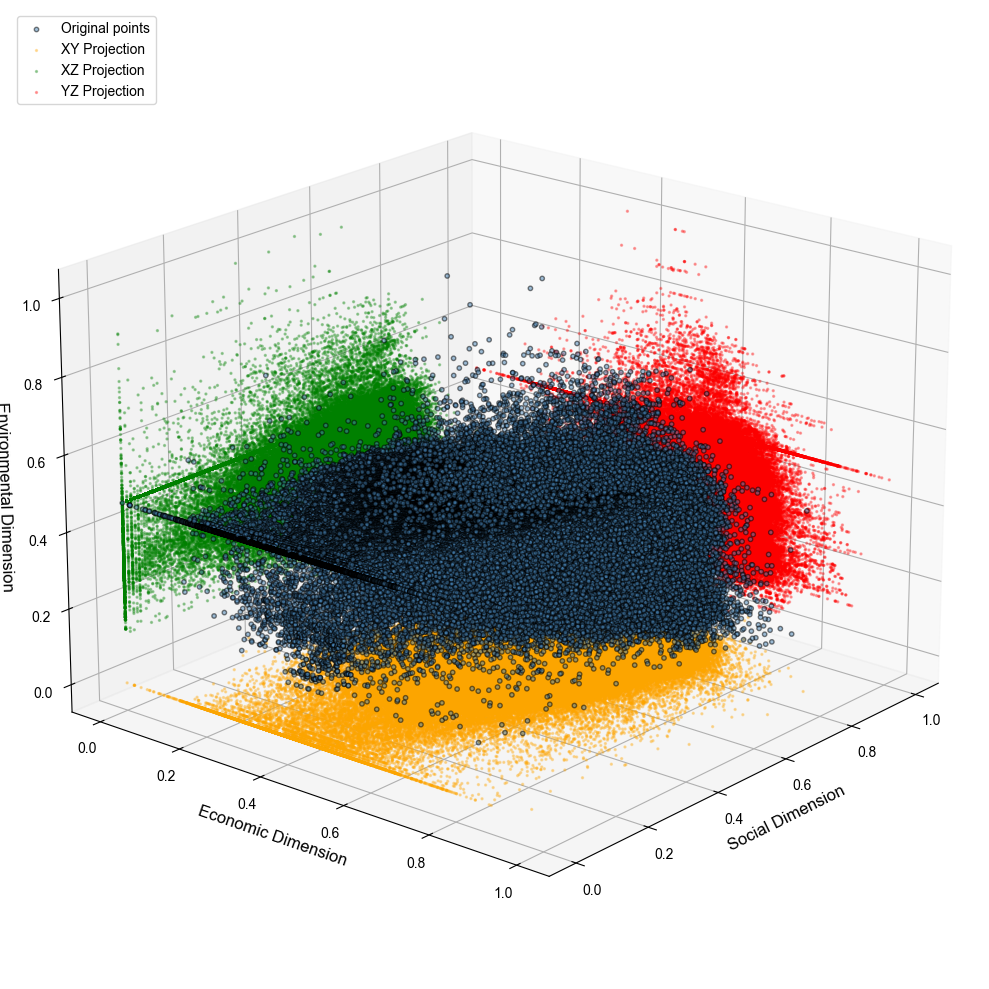

In [21]:
# Create 3D figure
fig_3d = plt.figure(figsize=(10, 10))
ax = fig_3d.add_subplot(111, projection='3d')

# Input data vectors
x = df_scaled['log_VIT202311'].values        # Social dimension (Vitality Index)
y = df_scaled['log_NTL2023_focal'].values    # Economic dimension (Nighttime Light)
z = df_scaled['UHIDAY2020_07_inv'].values    # Environmental dimension (Inverted UHI)

# Main 3D scatter plot
ax.scatter(x, y, z, c='steelblue', alpha=0.5, s=10, edgecolors='black', label='Original points')

# Compute min and max values for projection planes
x_min, y_min, z_min = np.min(x), np.min(y), np.min(z)
x_max, y_max, z_max = np.max(x), np.max(y), np.max(z)

# XY-plane projection (Z fixed)
ax.scatter(x, y, np.full_like(x, z_min), c='orange', alpha=0.3, s=2, label='XY Projection')

# XZ-plane projection (Y fixed)
ax.scatter(x, np.full_like(y, y_min), z, c='green', alpha=0.3, s=2, label='XZ Projection')

# YZ-plane projection (X fixed)
ax.scatter(np.full_like(x, x_max), y, z, c='red', alpha=0.3, s=2, label='YZ Projection')

ax.set_xlabel('Social Dimension', fontsize=12)
ax.set_ylabel('Economic Dimension', fontsize=12)
ax.set_zlabel('Environmental Dimension', fontsize=12)
ax.invert_xaxis()
ax.view_init(elev=20, azim=40)
ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

## Clustering & Pareto filtering

- Noise Reduction: Clustering smooths out local noise and minor fluctuations, helping highlight robust, structurally meaningful Pareto-optimal patterns rather than outliers.
- Improved Surface Fitting: Fitting a surface to a smaller, cleaner set of optimal points improves the quality and interpretability of the Pareto frontier approximation.
- Scalable Evaluation Framework: Once the Pareto front is established from cluster centers, it can be used to evaluate the entire dataset efficiently by calculating distances to the frontier.

In [37]:
# X_std = df_scaled[targets_processed].values

# from sklearn.cluster import KMeans
# import pandas as pd
# from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
# k_list = [500, 1000, 1500, 2000, 3000, 5000]  # Modify this list as needed
# pareto_results = {}

# for k in k_list:
#     print(f"\n▶ Running KMeans for k = {k}")
    
#     # Run KMeans clustering
#     kmeans = KMeans(n_clusters=k, random_state=42).fit(X_std)
#     centers_std = kmeans.cluster_centers_
#     centers_original = scaler.inverse_transform(centers_std)

#     # Perform Pareto filtering
#     F_inv = -1 * centers_original  # Convert to minimization problem
#     nds = NonDominatedSorting()
#     pareto_idx = nds.do(F_inv, only_non_dominated_front=True)
#     pareto_centers = centers_original[pareto_idx]

#     # Build output DataFrame
#     df = pd.DataFrame(pareto_centers, columns=targets_processed)
#     df['Global_ID'] = [f"cluster_{i}" for i in pareto_idx]
#     df = df[['Global_ID'] + targets_processed]

#     # Store the result
#     pareto_results[f"k{k}"] = df
#     print(f"Selected {len(df)} Pareto-optimal cluster centers for k = {k}")

In [38]:
# df_pareto_centers_k1000 = pareto_results['k1000']
# df_pareto_centers_k1000.describe()

In [39]:
# import os

# # Ensure the output folder exists
# os.makedirs("output", exist_ok=True)

# # Loop through results and save each DataFrame to CSV
# for k in [500, 1000, 1500, 2000, 3000, 5000]:
# # for k in [1000]:
#     df = pareto_results[f'k{k}']
#     output_path = f"../output/pareto_centers_k{k}.csv"
#     df.to_csv(output_path, index=False)
#     print(f"Saved: {output_path}")

## PPF fit & Efficiency calculate

In [22]:
df_pareto_centers = pd.read_csv(r"../output/pareto_centers_k5000.csv")
print(df_pareto_centers.shape)
df_pareto_centers.head(5)

(49, 4)


,Global_ID,log_NTL2023_focal,log_VIT202311,UHIDAY2020_07_inv
0,cluster_231,0.56,0.35,0.90
1,cluster_422,0.80,0.62,0.57
2,cluster_508,0.68,0.79,0.51
3,cluster_758,0.50,0.58,0.98
4,cluster_795,0.70,0.83,0.47


In [23]:
surface_data = df_pareto_centers
sample_data = grid500

# Define variables for the original column names to be used
x_col = 'log_NTL2023_focal'
y_col = 'log_VIT202311'
z_col = 'UHIDAY2020_07_inv'
XY = df_pareto_centers[['log_VIT202311', 'log_NTL2023_focal']].values
z = df_pareto_centers['UHIDAY2020_07_inv'].values

# Extract the 3D points that define the surface.
surface_points = surface_data[[x_col, y_col, z_col]].values

# Surface interpolation using RBF
print("Fitting RBFInterpolator model...")
smoothing_factor = 0.05
rbf_model = RBFInterpolator(XY, z, kernel='thin_plate_spline', smoothing=smoothing_factor)  # or {'thin_plate_spline', 'linear', 'cubic', 'quintic'}

# To calculate the distance, create a dense cloud of points on the RBF surface.
print("Creating a dense point cloud of the fitted surface...")
grid_density = 300 # Higher density means more accurate distances but more computation
x_dense = np.linspace(surface_points[:, 0].min(), surface_points[:, 0].max(), grid_density)
y_dense = np.linspace(surface_points[:, 1].min(), surface_points[:, 1].max(), grid_density)
Xg, Yg = np.meshgrid(x_dense, y_dense)
XY_grid = np.vstack([Xg.ravel(), Yg.ravel()]).T

# Predict the Z values for the dense grid to form the surface points
Zg = rbf_model(XY_grid)
dense_surface_points = np.hstack([XY_grid, Zg.reshape(-1, 1)])

# Calculate true Euclidean distance to surface using KDTree
# Build the KDTree from the dense surface point cloud
print("Building KDTree for efficient distance calculation...")
surface_tree = KDTree(dense_surface_points)

# Extract the 3D coordinates of the sample points
sample_points_3d = sample_data[[x_col, y_col, z_col]].values

# For each sample point, find the distance to the nearest point on the dense surface
print("Querying KDTree to find shortest distances...")
distances, _ = surface_tree.query(sample_points_3d)

# Add the calculated distances as a new column to the dataframe
sample_data['distance_to_surface'] = distances

# The performance is defined as 1 minus the normalized distance
min_dist = distances.min()
max_dist = distances.max()

# Normalize the distances to be between 0 and 1
epsilon = 1e-9
normalized_distances = (distances - min_dist) / (max_dist - min_dist + epsilon)

# The performance score is 1 minus the normalized distance
performance_score = 1 - normalized_distances

# Add the performance score as a new column
sample_data['performance_score'] = performance_score

Fitting RBFInterpolator model...
Creating a dense point cloud of the fitted surface...
Building KDTree for efficient distance calculation...
Querying KDTree to find shortest distances...


In [24]:
sample_data['performance_score'].describe()

count   194941.00
mean         0.66
std          0.14
min          0.00
25%          0.59
50%          0.68
75%          0.75
max          1.00
Name: performance_score, dtype: float64


Generating visualization...


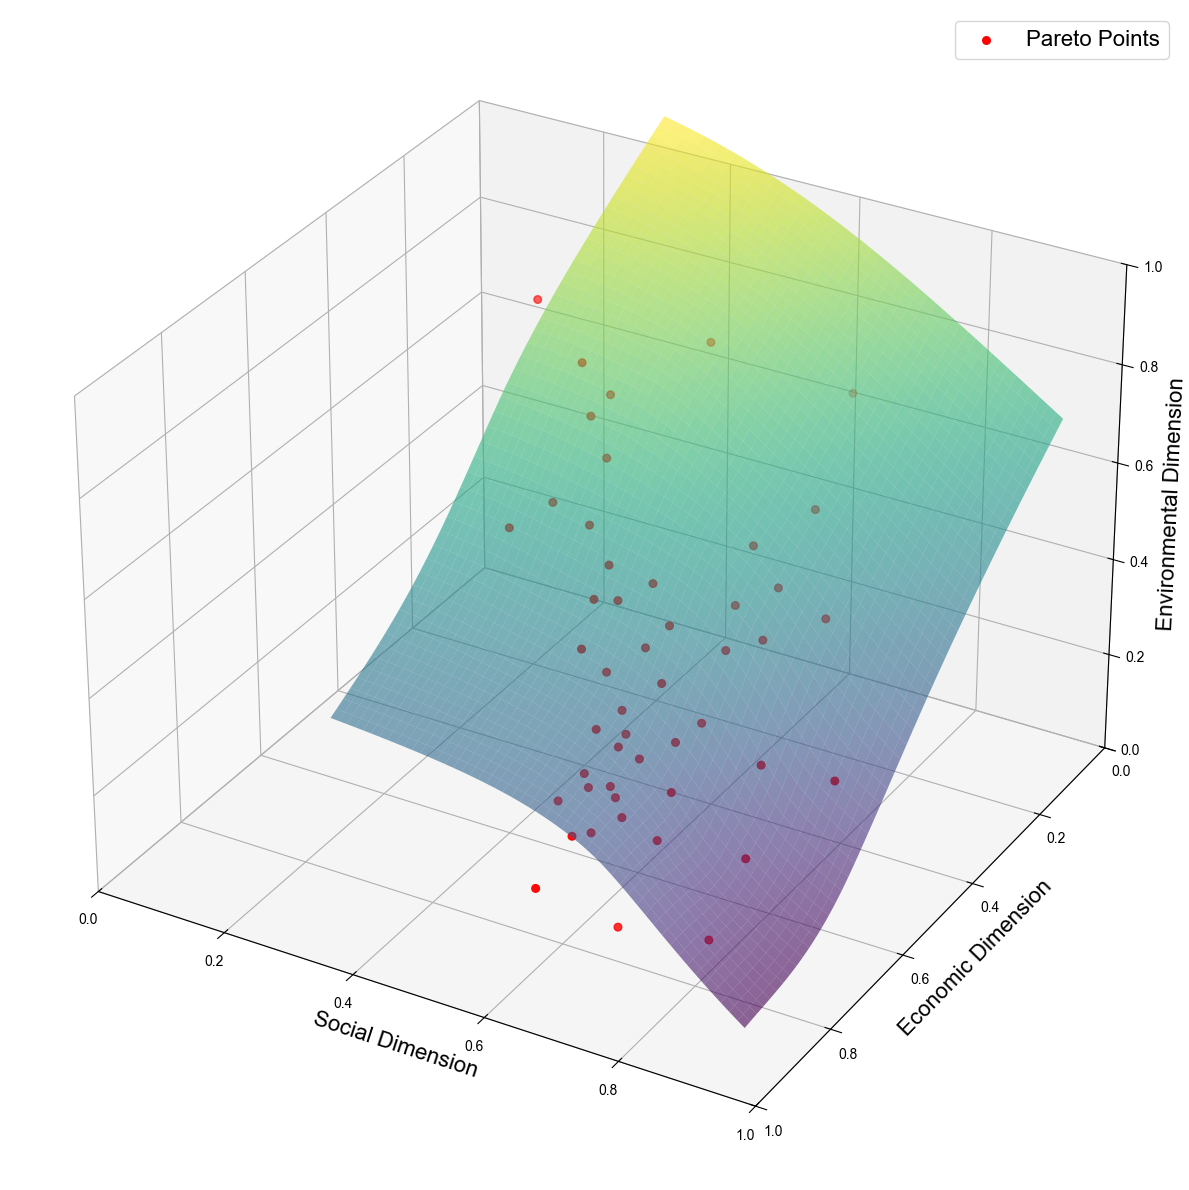

In [25]:
# Visualize surface and Pareto points
print("\nGenerating visualization...")
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# X_range_min = np.min(x_dense)
# X_range_max = np.max(x_dense)

# Y_range_min = np.min(y_dense)
# Y_range_max = np.max(y_dense)

# Z_range_min = np.min(Zg)
# Z_range_max = np.max(Zg)

# print(f"X (log_VIT202311): [{X_range_min:.4f}, {X_range_max:.4f}]")
# print(f"Y (log_NTL2023_focal): [{Y_range_min:.4f}, {Y_range_max:.4f}]")
# print(f"Z (UHIDAY2020_07_inv): [{Z_range_min:.4f}, {Z_range_max:.4f}]")

# For visualization, we can use the same meshgrid as for the dense points
ax.plot_surface(Xg, Yg, Zg.reshape(Xg.shape), cmap='viridis', alpha=0.6)

# Plot the original Pareto points that were used to define the surface.
ax.scatter(surface_points[:, 0], surface_points[:, 1], surface_points[:, 2], 
           c='red', 
           s=30, # size of points
           depthshade=True, # Add a shadow effect for depth
           label='Pareto Points')

# Set labels and title
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)
ax.set_zlim(0, 1) 

ax.set_xlabel('Social Dimension', fontsize=16) # \n(log_VIT202311)
ax.set_ylabel('Economic Dimension', fontsize=16) # \n(log_NTL2023_focal)
ax.set_zlabel('Environmental Dimension', fontsize=16) # \n(UHIDAY2020_07_inv)
ax.legend(fontsize=16)
plt.tight_layout()

# Save the figure
plt.savefig('pareto_surface_visualization_rbf.png')

# Model training

In [26]:
grid500.describe()

,Global_ID,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightOtherness,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,footprintAreaTotal,totalArea,areaVariance,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,evennessIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label,log_NTL2023_focal,log_VIT202311,distance_to_surface,performance_score
count,194941.00,189742.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194352.00,194941.00,194941.00,194941.00,194941.00
mean,98137.51,28.88,28.65,1414.14,0.37,46.70,893.91,16.53,30.42,9.58,20.83,0.10,0.00,0.30,315.42,4959.32,112.06,347.82,22.65,4.55,0.54,33192.68,216494.27,191423545.70,5437.01,180006.93,0.50,185.28,0.86,255.17,0.87,0.13,0.62,0.88,195.28,1.08,0.77,4.60,5.59,6.16,40.04,15.03,499.16,203.23,2063.94,5.26,0.55,0.56,0.29,0.66
std,56862.94,19.36,17.87,1821.23,0.10,50.96,1035.48,8.72,24.26,4.91,23.99,0.17,0.00,0.28,352.35,4245.40,60.43,230.34,35.73,1.40,0.17,27474.13,210010.02,2300870309.71,7776.02,80149.49,0.29,50203.04,0.11,311.22,0.84,0.11,0.19,0.10,382.88,0.81,0.57,6.46,12.92,2.70,36.33,31.56,212.18,87.42,1591.36,1.77,0.11,0.17,0.12,0.14
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,49033.00,15.06,15.64,206.86,0.30,12.00,144.00,12.00,12.00,6.00,0.00,0.02,0.00,0.00,72.00,1417.38,83.02,202.45,4.35,4.57,0.53,8888.17,37241.51,3519241.57,1875.57,131267.14,0.29,0.00,0.79,52.87,0.15,0.04,0.51,0.81,4.00,0.00,0.40,1.00,0.00,5.26,26.51,5.37,459.16,177.27,1230.33,5.00,0.48,0.48,0.21,0.59
50%,97800.00,25.85,26.01,731.14,0.38,35.00,559.00,16.67,27.00,12.00,15.00,0.04,0.00,0.28,222.00,4200.02,110.75,319.04,14.07,4.82,0.57,29057.71,157756.72,20726892.83,4027.77,222107.39,0.48,0.01,0.88,178.28,0.63,0.12,0.62,0.90,40.00,1.26,0.70,3.00,2.00,5.92,34.90,8.95,586.78,236.19,1926.76,5.00,0.56,0.59,0.28,0.68
75%,147135.00,38.67,38.17,2003.43,0.47,65.00,1315.00,21.99,40.00,12.00,28.00,0.09,0.01,0.43,445.00,7512.92,137.30,461.66,28.38,5.08,0.62,51784.69,347326.83,74777609.98,6726.97,238506.86,0.71,0.04,0.95,347.80,1.39,0.21,0.74,0.96,212.00,1.82,1.05,6.00,6.00,7.02,45.61,14.67,645.52,263.21,2637.05,7.00,0.63,0.68,0.36,0.75
max,196769.00,465.96,348.37,68494.71,1.00,1189.00,22354.50,130.50,535.00,112.00,532.00,1.00,0.09,2.87,8619.00,50912.47,1689.25,5146.21,1689.25,39.49,0.99,226640.62,3672930.95,662000000000.00,664544.83,250000.00,1.00,21048158.03,1.00,12613.17,14.69,0.91,1.00,1.00,10124.00,2.48,19.56,376.00,2254.00,99.47,687.04,687.04,706.01,358.32,21993.84,7.00,1.00,1.00,0.86,1.00


In [ ]:
# Set global random seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Ensure output directories exist
os.makedirs("../output/models", exist_ok=True)
os.makedirs("../output/param_logs", exist_ok=True)

# ========================= XGBoost Training Loop =========================
targets = ['performance_score']

for target in targets:
    print(f"\n===== Training model for target: {target} =====")

    # Filter rows with non-missing values for target and features
    df_target = grid500.copy()
    
    # Split features and target
    X = df_target[features]
    y = df_target[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED
    )

    print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

    # Define base XGBoost model
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',  # 关键修改：极速提升训练速度
        device='cuda',
        random_state=SEED,
        n_jobs=-1
    )

    # Randomized hyperparameter search
    param_dist = {
        'n_estimators': [500, 1000], 
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [5, 7, 9],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'min_child_weight': [10, 30, 50],
        'reg_alpha': [0.1, 1, 10],
        'reg_lambda': [1, 5, 10],
    }
    
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=50,
        cv=3,
        scoring='neg_mean_squared_error',
        verbose=1,
        random_state=SEED
    )

    # Fit model
    random_search.fit(X_train, y_train)

    # Retrieve best estimator
    best_model = random_search.best_estimator_

    # Save trained model
    model_path = f"../output/models/{target}_xgb_model.pkl"
    joblib.dump(best_model, model_path)
    print(f"✔ Saved best model to: {model_path}")

    # Save best hyperparameters
    best_params = random_search.best_params_
    param_path = f"../output/param_logs/{target}_best_params.json"
    with open(param_path, 'w') as f:
        json.dump(best_params, f, indent=4)
    print(f"✔ Saved best parameters to: {param_path}")

    # Evaluate model performance
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)




===== Training model for target: performance_score =====
Training samples: 155952, Testing samples: 38989
Fitting 3 folds for each of 50 candidates, totalling 150 fits
✔ Saved best model to: ../output/models/performance_score_xgb_model.pkl
✔ Saved best parameters to: ../output/param_logs/performance_score_best_params.json


TypeError: got an unexpected keyword argument 'squared'

In [40]:
train_rmse = root_mean_squared_error(y_train, y_pred_train)
test_rmse = root_mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test  RMSE: {test_rmse:.4f}")
print(f"Test   R² : {test_r2:.4f}")

print("\n✅ All models trained successfully.")

Train RMSE: 0.0765
Test  RMSE: 0.0918
Test   R² : 0.5582

✅ All models trained successfully.


In [41]:
# Set global random seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Ensure output directories exist
os.makedirs("../output/models2", exist_ok=True)
os.makedirs("../output/param_logs2", exist_ok=True)

# ========================= XGBoost Training Loop =========================
targets = ['performance_score']

for target in targets:
    print(f"\n===== Training model for target: {target} =====")

    # Filter rows with non-missing values for target and features
    df_target = grid500.copy()
    
    # Split features and target
    X = df_target[features]
    y = df_target[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED
    )

    print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

    # Define base XGBoost model
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        device='cuda',
        random_state=SEED,
        n_jobs=-1
    )

    # Randomized hyperparameter search
    param_dist = {
        'n_estimators': [500, 1000], 
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [5, 7, 9],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'min_child_weight': [10, 30, 50],
        'reg_alpha': [0.1, 1, 10],
        'reg_lambda': [1, 5, 10],
    }
    
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=200,
        cv=5,
        scoring='neg_mean_squared_error',
        verbose=1,
        random_state=SEED
    )

    # Fit model
    random_search.fit(X_train, y_train)

    # Retrieve best estimator
    best_model = random_search.best_estimator_

    # Save trained model
    model_path = f"../output/models2/{target}_xgb_model.pkl"
    joblib.dump(best_model, model_path)
    print(f"✔ Saved best model to: {model_path}")

    # Save best hyperparameters
    best_params = random_search.best_params_
    param_path = f"../output/param_logs2/{target}_best_params.json"
    with open(param_path, 'w') as f:
        json.dump(best_params, f, indent=4)
    print(f"✔ Saved best parameters to: {param_path}")

    # Evaluate model performance
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    train_rmse = root_mean_squared_error(y_train, y_pred_train)
    test_rmse = root_mean_squared_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test  RMSE: {test_rmse:.4f}")
    print(f"Test   R² : {test_r2:.4f}")

print("\n✅ All models trained successfully.")


===== Training model for target: performance_score =====
Training samples: 155952, Testing samples: 38989
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
✔ Saved best model to: ../output/models2/performance_score_xgb_model.pkl
✔ Saved best parameters to: ../output/param_logs2/performance_score_best_params.json
Train RMSE: 0.0765
Test  RMSE: 0.0918
Test   R² : 0.5582

✅ All models trained successfully.


# Model interpreting

## Model evaluation metrics

In [49]:
# Define model folder
model_dir = "../output/models"

# Dictionary to store loaded models
models = {}

# Loop through each target, load the model and store in dict
for target in targets:
    model_path = os.path.join(model_dir, f"{target}_xgb_model.pkl")
    if os.path.exists(model_path):
        models[target] = joblib.load(model_path)
        print(f"✔ Loaded model for {target}")
    else:
        print(f"⚠ Model file not found: {model_path}")

✔ Loaded model for performance_score


In [50]:
# Model re-evaluate
# Set random seed to match training split
SEED = 42

# Store evaluation metrics for each model
evaluation_results = {}

for target in targets:
    print(f"\n📊 Evaluating model: {target}")
    
    model = models[target]
    print(model.get_params())
    
    # Extract features and target from full dataset
    X = grid500[features].copy()
    y = grid500[target].copy()

    # Use the same split strategy as training
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED
    )

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Compute metrics
    train_rmse = root_mean_squared_error(y_train, y_pred_train)
    test_rmse = root_mean_squared_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    # Store results
    evaluation_results[target] = {
        "Train_RMSE": train_rmse,
        "Test_RMSE": test_rmse,
        "Test_R2": test_r2
    }

# Convert to DataFrame
df_eval = pd.DataFrame.from_dict(evaluation_results, orient='index')
df_eval.reset_index(inplace=True)
df_eval.rename(columns={'index': 'Target'}, inplace=True)
df_eval = df_eval.round(6)

# Save to CSV
# save_path = "../output/model_evaluation_summary.csv"
# df_eval.to_csv(save_path, index=False)

df_eval


📊 Evaluating model: performance_score
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 9, 'max_leaves': None, 'min_child_weight': 50, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 500, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 1, 'reg_lambda': 1, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.9, 'tree_method': 'hist', 'validate_parameters': None, 'verbosity': None}


,Target,Train_RMSE,Test_RMSE,Test_R2
0,performance_score,0.08,0.09,0.56


## Feature importance

In [51]:
# based on XGBoost
import os
import pandas as pd

# Ensure the output folder exists
os.makedirs("../output/interpret_models", exist_ok=True)

# Dictionary to collect importance data
importance_all = {}

# Loop over targets to compute and store importance
for target in targets:
    model = models[target]
    booster = model.get_booster()
    importance_dict = booster.get_score(importance_type='gain')

    # Convert to DataFrame, fill missing features with 0
    importance_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=[f'Importance_{target}'])
    importance_df.index.name = 'Feature'
    importance_all[target] = importance_df

# Merge all importance DataFrames on 'Feature'
combined_importance = pd.concat(importance_all.values(), axis=1)
combined_importance.index.name = 'Feature'
combined_importance = combined_importance.fillna(0).reset_index()

# Optional: reorder by average importance across targets
mean_col = combined_importance.iloc[:, 1:].mean(axis=1)
combined_importance.insert(1, 'MeanImportance', mean_col)
combined_importance.sort_values(by='MeanImportance', ascending=False, inplace=True)

# Save to CSV
# combined_csv_path = "../output/interpret_models/feature_importance.csv"
# combined_importance.to_csv(combined_csv_path, index=False)
# print(f"✅ Combined feature importance saved to: {combined_csv_path}")
combined_importance

,Feature,MeanImportance,Importance_performance_score
3,basePerimeterTotal,3.12,3.12
9,FAR,1.60,1.60
7,totalArea,0.84,0.84
12,intersectionDensity,0.78,0.78
13,poiDensity,0.37,0.37
11,roadDensity,0.34,0.34
17,maxHeight,0.26,0.26
19,heightRange,0.24,0.24
28,parcelArea,0.18,0.18
18,minHeight,0.17,0.17


Starting SHAP value calculation...
SHAP values calculated successfully.


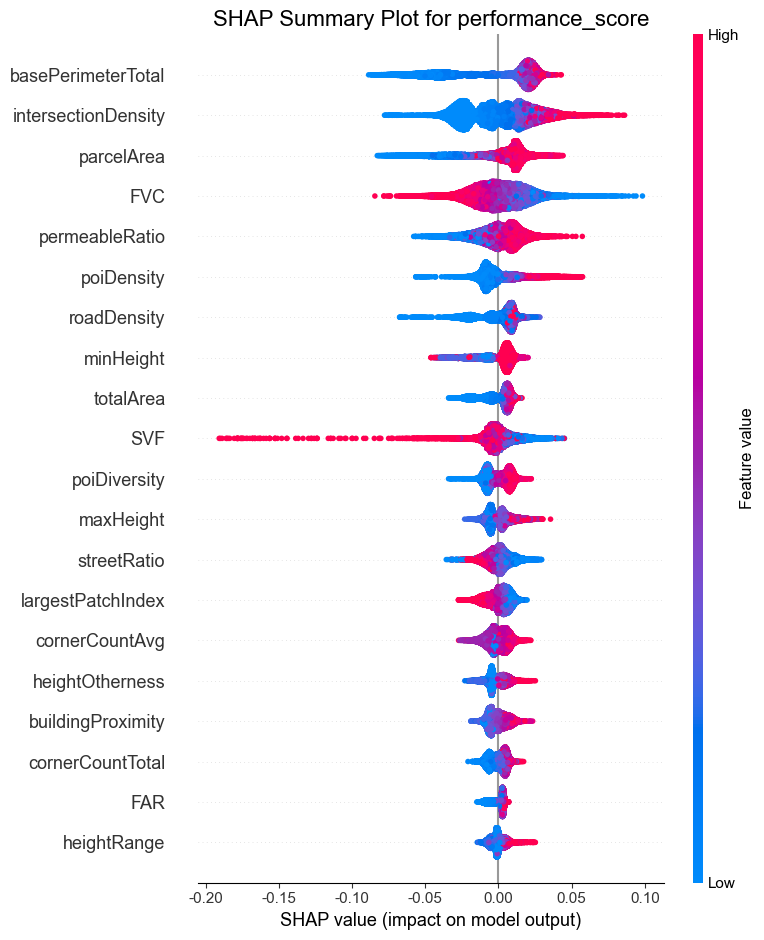

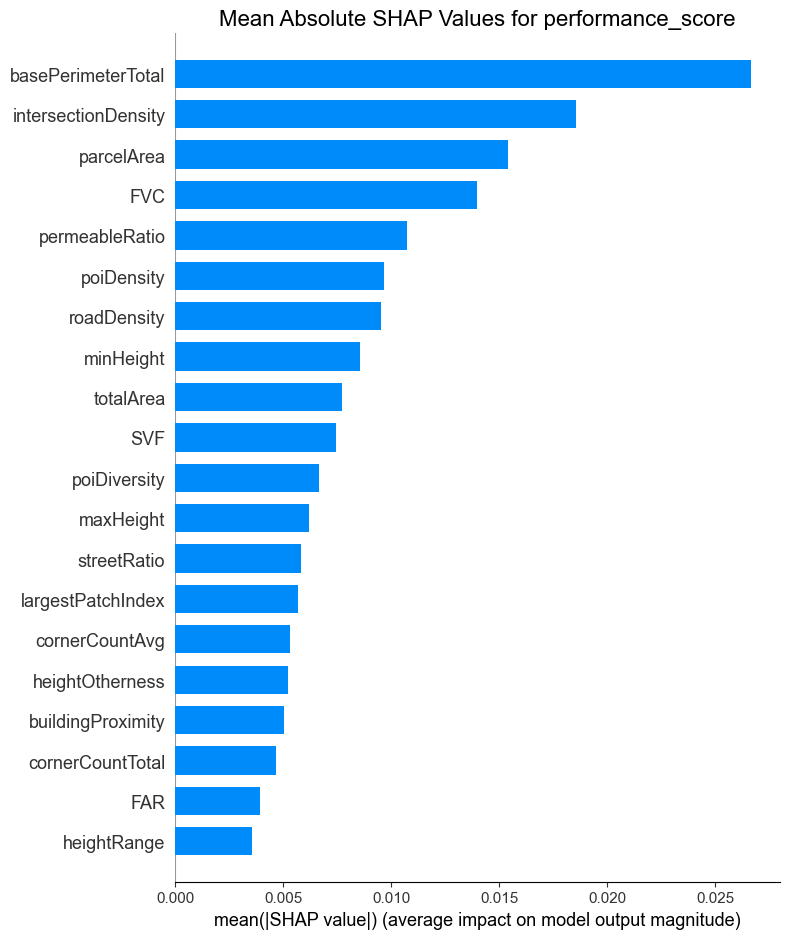

In [53]:
# based on SHAP
print("Starting SHAP value calculation...")

# 1. Initialize the TreeExplainer
# XGBoost is a tree-based model, so TreeExplainer is the most efficient and accurate method.
# It is much faster than KernelExplainer for this type of model.
explainer = shap.TreeExplainer(model)

# 2. Calculate SHAP values for the test set
# If X_test is very large (>50k rows), this might take some time.
# To speed it up, you can calculate on a subset: shap_values = explainer(X_test.sample(5000))
shap_values = explainer(X_test)

print("SHAP values calculated successfully.")

# ========================= Visualization =========================

# 3. Summary Plot (Beeswarm Plot) - Recommended
# This plot shows both feature importance (y-axis ranking) and effect direction (color).
# - Each dot is a sample.
# - Color represents feature value (Red = High, Blue = Low).
# - Horizontal position represents impact on model output (SHAP value).
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test, show=False)
plt.title(f"SHAP Summary Plot for {target}", fontsize=16)
plt.tight_layout()
# Save the figure
plt.savefig(f"../output/shap_summary_beeswarm_{target}.png", dpi=300)
plt.show()

# 4. Feature Importance Bar Chart
# This plot simplifies the view by showing the mean absolute SHAP value.
# It only shows "how much" a feature matters, not "how" (positive/negative) it affects the result.
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title(f"Mean Absolute SHAP Values for {target}", fontsize=16)
plt.tight_layout()
# Save the figure
plt.savefig(f"../output/shap_importance_bar_{target}.png", dpi=300)
plt.show()

In [56]:
# Create output directory
OUTPUT_DIR = "../output/interpret_models/pdp_plots/pdpbox_v3"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Loop through each target
for target in targets:
    print(f"\n📊 Generating PDPs for target: {target}")

    # Load model for current target
    model = models[target]

    # Filter input data
    df_target = grid500.dropna(subset=[target] + features).copy()
    X = df_target[features]
    y = df_target[target]

    print(f"▶ Data shape for {target}: X = {X.shape}, y = {y.shape}")

    # Loop through features
    for feature in features:
        try:
            pdp_obj = pdp.PDPIsolate(
                model=model,
                df=X,
                model_features=features,
                feature=feature,
                feature_name=feature,
                n_classes=0,
            )

            # Plot PDP + ICE
            fig, axes = pdp_obj.plot(
                center=True, # centered
                plot_lines=True, # lines
                frac_to_plot=100,
                cluster=False,
                n_cluster_centers=None,
                cluster_method='accurate',
                plot_pts_dist=True,
                to_bins=True,
                show_percentile=True,
                which_classes=None,
                figsize=None,
                dpi=300,
                ncols=2,
                plot_params={"pdp_hl": True},
                engine='matplotlib',
                template='plotly_white',
            )

            # Title and save
            fig.suptitle(f"PDP: {feature}_PDP_{target}", fontsize=14)
            fig.tight_layout()
            save_path = f"{OUTPUT_DIR}/{feature}_PDP_{target}.png"
            plt.savefig(save_path, dpi=300)
            plt.close(fig)
            print(f"✅ Saved to: {save_path}")

        except Exception as e:
            print(f"⚠️ Skipped {feature} for {target} due to error: {e}")


📊 Generating PDPs for target: performance_score
▶ Data shape for performance_score: X = (194941, 40), y = (194941,)
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.69it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/buildingCount_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:02<00:00,  4.48it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/totalHeight_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 9/9 [00:02<00:00,  3.87it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/avgHeight_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.49it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/basePerimeterTotal_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.46it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/basePerimeterAvg_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:02<00:00,  3.95it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/compactness_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:02<00:00,  4.42it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/footprintAreaTotal_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.45it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/totalArea_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.28it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/avgBuildingArea_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.13it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/FAR_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:02<00:00,  4.98it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/coverageRatio_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 8/8 [00:01<00:00,  4.87it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/roadDensity_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 8/8 [00:01<00:00,  5.12it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/intersectionDensity_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 9/9 [00:01<00:00,  4.61it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/poiDensity_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 8/8 [00:01<00:00,  5.27it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/poiDiversity_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:02<00:00,  4.90it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/FVC_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:02<00:00,  4.95it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/permeableRatio_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:02<00:00,  4.74it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/maxHeight_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 5/5 [00:00<00:00,  5.24it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/minHeight_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 7/7 [00:01<00:00,  5.21it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/heightRange_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.27it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/heightIndex_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:02<00:00,  4.62it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/heightDensity_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 8/8 [00:01<00:00,  5.10it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/heightOtherness_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:02<00:00,  4.91it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/cornerCountTotal_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.40it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/basePerimeterMax_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.46it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/basePerimeterMin_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.18it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/shapeComplexity_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.85it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/areaVariance_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.10it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/parcelArea_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.19it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/largestPatchIndex_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.42it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/shape3DIndex_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.19it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/evennessIndex_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.38it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/cornerCountAvg_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.30it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/buildingProximity_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.58it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/buildingMinDist_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.50it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/buildingMaxDist_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.69it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/buildingDistAvg_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 9/9 [00:01<00:00,  5.28it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/buildingDistVar_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:02<00:00,  4.19it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/SVF_PDP_performance_score.png
obtain pred_func from the provided model.


100%|██████████| 10/10 [00:01<00:00,  5.10it/s]


✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox_v3/streetRatio_PDP_performance_score.png


## PDP + SHAP


📊 Processing Target: performance_score...
   Computing SHAP values for performance_score...
   Features sorted by importance: ['basePerimeterTotal', 'intersectionDensity', 'parcelArea', 'FVC', 'permeableRatio', 'poiDensity', 'roadDensity', 'minHeight', 'totalArea', 'SVF', 'poiDiversity', 'maxHeight', 'streetRatio', 'largestPatchIndex', 'cornerCountAvg', 'heightOtherness', 'buildingProximity', 'cornerCountTotal', 'FAR', 'heightRange', 'avgHeight', 'footprintAreaTotal', 'shapeComplexity', 'compactness', 'basePerimeterMin', 'areaVariance', 'basePerimeterMax', 'avgBuildingArea', 'heightIndex', 'basePerimeterAvg', 'totalHeight', 'shape3DIndex', 'buildingDistAvg', 'buildingDistVar', 'evennessIndex', 'buildingCount', 'buildingMaxDist', 'buildingMinDist', 'coverageRatio', 'heightDensity']
      >> Plotting: basePerimeterTotal (Rank 1)
      >> Plotting: intersectionDensity (Rank 2)
      >> Plotting: parcelArea (Rank 3)
      >> Plotting: FVC (Rank 4)


KeyboardInterrupt: 

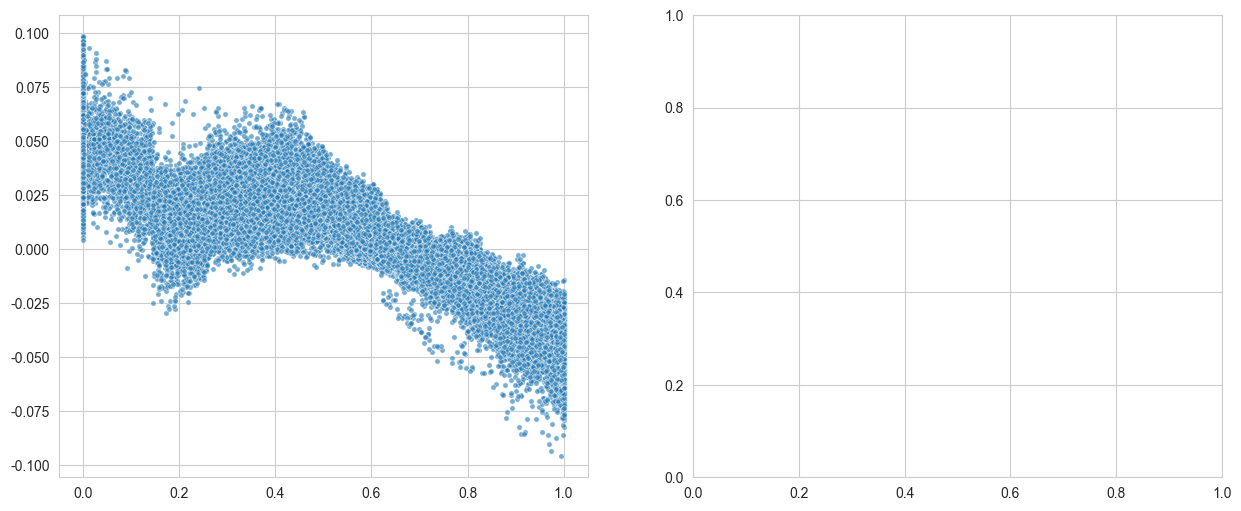

In [59]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.inspection import PartialDependenceDisplay

# ==========================================
# Level 1: Loop through each Target
# ==========================================
for target in targets:
    print(f"\n📊 Processing Target: {target}...")

    # 1. 准备数据
    model = models[target]
    df_target = grid500.dropna(subset=[target] + features).copy()
    X = df_target[features]
    
    # 2. 计算 SHAP 值 (用于排序和画左图)
    print(f"   Computing SHAP values for {target}...")
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X)
    
    # 3. 获取特征重要性排名
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    imp_df = pd.DataFrame({
        'feature': features,
        'importance': mean_abs_shap
    }).sort_values(by='importance', ascending=False)
    
    sorted_features = imp_df['feature'].tolist()
    print(f"   Features sorted by importance: {sorted_features}")

    # ==========================================
    # Level 2: Loop through EACH Feature
    # ==========================================
    for i, current_feature in enumerate(sorted_features):
        print(f"      >> Plotting: {current_feature} (Rank {i+1})")
        
        # 设置画布：左右两张图
        sns.set_style("whitegrid")
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # -------------------------------------------------
        # 1. 左图: SHAP Dependence (单变量视角)
        # -------------------------------------------------
        ax_shap = axes[0]
        x_data = X[current_feature]
        y_data = shap_values[:, features.index(current_feature)].values

        # 统一使用深蓝色，无额外颜色映射
        ax_shap.scatter(x_data, y_data, color='#1f77b4', alpha=0.6, s=15, edgecolor='w', linewidth=0.5)

        # 添加趋势线 (Polynomial Order 3)
        sns.regplot(x=x_data, y=y_data, scatter=False, order=3, 
                    ax=ax_shap, color='red', 
                    line_kws={'linewidth': 2, 'linestyle': '--', 'label': 'Trend'})

        ax_shap.set_xlabel(current_feature, fontsize=12, fontweight='bold')
        ax_shap.set_ylabel(f"SHAP Value (Impact on {target})", fontsize=12, fontweight='bold')
        ax_shap.set_title(f"SHAP Dependence: {current_feature}", fontsize=14)
        ax_shap.axhline(0, color='gray', linestyle=':', linewidth=1)
        ax_shap.legend()

        # -------------------------------------------------
        # 2. 右图: PDP + ICE (平均效应视角)
        # -------------------------------------------------
        ax_pdp = axes[1]
        
        PartialDependenceDisplay.from_estimator(
            model, X, [current_feature], 
            kind='both', 
            ax=ax_pdp, 
            subsample=50, 
            line_kw={'color': 'red', 'linewidth': 2, 'label': 'PDP (Average)'},
            ice_lines_kw={'color': 'gray', 'alpha': 0.2, 'linewidth': 0.5}
        )
        
        # 底部 Rug Plot 显示数据密度
        sns.rugplot(data=X, x=current_feature, ax=ax_pdp, height=0.05, color='black', alpha=0.5)
        
        ax_pdp.set_title(f"PDP & ICE: {current_feature}", fontsize=14)
        ax_pdp.set_ylabel(f"Predicted {target}", fontsize=12)
        ax_pdp.legend(loc='upper right')

        # -------------------------------------------------
        # 3. 保存
        # -------------------------------------------------
        plt.tight_layout()
        
        # 文件名带 rank 编号
        rank_str = str(i+1).zfill(2)
        filename = f"../output/interpret_models/SimpleAnalysis_{target}_Rank{rank_str}_{current_feature}.png"
        
        plt.savefig(filename, dpi=150)
        plt.close()

print("\n✅ All clean plots generated successfully!")

In [60]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 设置绘图风格
sns.set_style("whitegrid")

# ==========================================
# Level 1: 遍历每个 Target
# ==========================================
for target in targets:
    print(f"\n📊 Processing Target: {target}...")

    # 1. 准备数据与模型
    model = models[target]
    df_target = grid500.dropna(subset=[target] + features).copy()
    X = df_target[features]
    
    # 2. 计算 SHAP 值
    print(f"   Computing SHAP values for {target}...")
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X)
    
    # 3. 按重要性排序特征
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    imp_df = pd.DataFrame({
        'feature': features,
        'importance': mean_abs_shap
    }).sort_values(by='importance', ascending=False)
    
    sorted_features = imp_df['feature'].tolist()
    print(f"   Features sorted by importance: {sorted_features}")

    # ==========================================
    # Level 2: 遍历每个特征 (画单张图)
    # ==========================================
    for i, current_feature in enumerate(sorted_features):
        print(f"      >> Plotting SHAP: {current_feature} (Rank {i+1})")
        
        # 创建单张画布
        plt.figure(figsize=(10, 6))
        
        # 获取绘图数据
        x_data = X[current_feature]
        y_data = shap_values[:, features.index(current_feature)].values

        # A. 绘制散点 (统一深蓝色，无交互染色)
        plt.scatter(x_data, y_data, color='#1f77b4', alpha=0.5, s=20, edgecolor='w', linewidth=0.5)

        # B. 添加趋势线 (三次多项式拟合，帮助识别非线性关系)
        sns.regplot(x=x_data, y=y_data, scatter=False, order=3, 
                    color='red', 
                    line_kws={'linewidth': 2, 'linestyle': '--', 'label': 'Trend (Poly fit)'})

        # C. 装饰图表
        plt.title(f"SHAP Dependence: {current_feature}\n(Rank {i+1} for {target})", fontsize=15)
        plt.xlabel(f"Feature Value: {current_feature}", fontsize=12, fontweight='bold')
        plt.ylabel(f"SHAP Value (Impact on Prediction)", fontsize=12, fontweight='bold')
        
        # 添加 0 值基准线 (0以上代表正向贡献，0以下代表负向贡献)
        plt.axhline(0, color='gray', linestyle=':', linewidth=1)
        plt.legend(loc='best')
        plt.tight_layout()

        # D. 保存
        rank_str = str(i+1).zfill(2)
        filename = f"../output/interpret_models/SHAP_Only_{target}_Rank{rank_str}_{current_feature}.png"
        plt.savefig(filename, dpi=150)
        plt.close() # 关闭画布，


📊 Processing Target: performance_score...
   Computing SHAP values for performance_score...
   Features sorted by importance: ['basePerimeterTotal', 'intersectionDensity', 'parcelArea', 'FVC', 'permeableRatio', 'poiDensity', 'roadDensity', 'minHeight', 'totalArea', 'SVF', 'poiDiversity', 'maxHeight', 'streetRatio', 'largestPatchIndex', 'cornerCountAvg', 'heightOtherness', 'buildingProximity', 'cornerCountTotal', 'FAR', 'heightRange', 'avgHeight', 'footprintAreaTotal', 'shapeComplexity', 'compactness', 'basePerimeterMin', 'areaVariance', 'basePerimeterMax', 'avgBuildingArea', 'heightIndex', 'basePerimeterAvg', 'totalHeight', 'shape3DIndex', 'buildingDistAvg', 'buildingDistVar', 'evennessIndex', 'buildingCount', 'buildingMaxDist', 'buildingMinDist', 'coverageRatio', 'heightDensity']
      >> Plotting SHAP: basePerimeterTotal (Rank 1)
      >> Plotting SHAP: intersectionDensity (Rank 2)
      >> Plotting SHAP: parcelArea (Rank 3)
      >> Plotting SHAP: FVC (Rank 4)
      >> Plotting SHA